In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


/Users/tanvirkaur/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv('train_ctrUa4K.csv')
df_test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


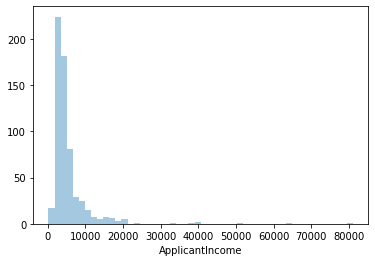

In [7]:
sns.distplot(df_train.ApplicantIncome,kde=False)

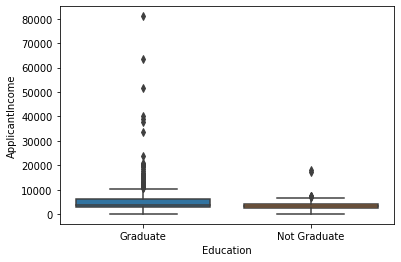

In [8]:
sns.boxplot(x='Education',y='ApplicantIncome',data = df_train)

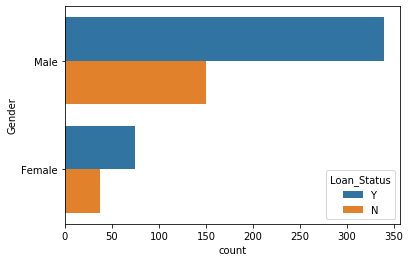

In [10]:
sns.countplot(y='Gender',hue='Loan_Status',data = df_train)

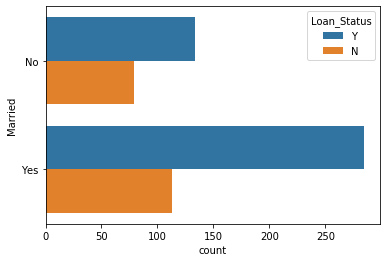

In [11]:
sns.countplot(y='Married',hue='Loan_Status',data = df_train)

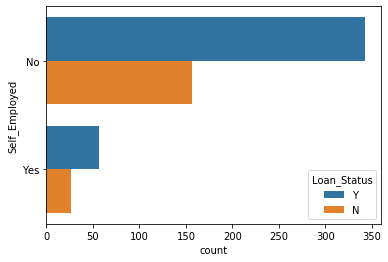

In [14]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data = df_train)

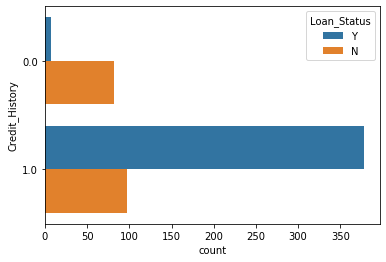

In [15]:
sns.countplot(y='Credit_History',hue='Loan_Status',data = df_train)

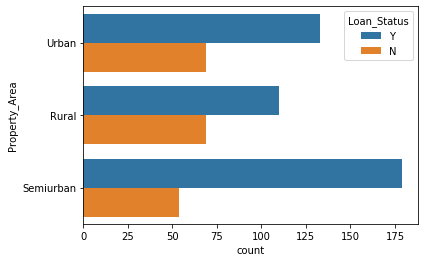

In [16]:
sns.countplot(y='Property_Area',hue='Loan_Status',data = df_train)

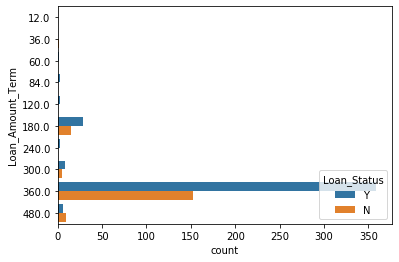

In [17]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data = df_train)

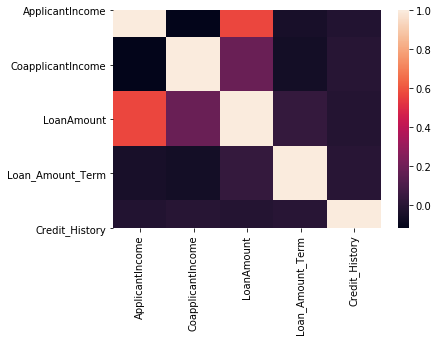

In [18]:
# check correlation
sns.heatmap(df_train.corr())

In [19]:
# check missing values
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# categorical missing values
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)

#numerical missing values
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

In [21]:
# check missing values
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])
df_train['TotalIncome']= df_train['ApplicantIncome'] +df_train['CoapplicantIncome'] 
df_train['TotalIncome_log']=np.log(df_train['TotalIncome'])

In [23]:
# categorical missing values
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

#numerical missing values
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)

In [24]:
# check missing values
df_test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df_test['TotalIncome']= df_test['ApplicantIncome'] +df_test['CoapplicantIncome'] 
df_test['TotalIncome_log']=np.log(df_test['TotalIncome'])

In [26]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


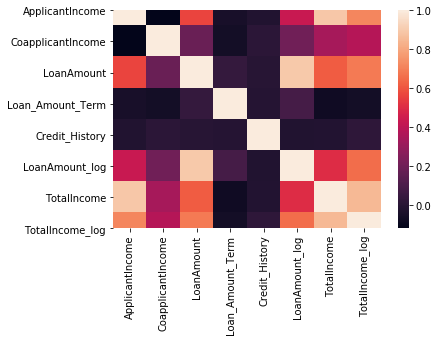

In [27]:
# check correlation
sns.heatmap(df_train.corr())

In [28]:
df_train=df_train.drop('Loan_ID',axis=1)
df_test1 = df_test.drop('Loan_ID',axis=1)

In [29]:
# encoding categorical values 
X = df_train.drop('Loan_Status',1)
y = df_train['Loan_Status']

X = pd.get_dummies(X)
df_train=pd.get_dummies(df_train)
df_test1=pd.get_dummies(df_test1)

In [30]:
# splitting the train and test data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.2)

In [31]:
#Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [32]:
# LR 
model = LogisticRegression()
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)


/Users/tanvirkaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8699186991869918

In [33]:
# RF
model =RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)


0.8699186991869918

In [34]:
pred_test = model.predict(df_test1)

In [35]:
submission = pd.DataFrame()
submission['Loan_ID']=df_test['Loan_ID']
submission['Loan_Status']=pred_test

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [36]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [37]:
submission.to_csv('loan_submission.csv')